In [1]:
import sys
sys.path.append('../')


In [2]:
from scripts.viewer import desi_image_cutout_for_nway
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Clean XMM and CSC data
from scripts.utils import data_path

xmm_all_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
csc_all_df = pd.read_pickle(data_path+'csc_all_lh.pkl')


ero_allcand_df = pd.read_pickle(
    data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl',
    compression='gzip')
ero_allcand_df  = ero_allcand_df.query('DET_LIKE_0>10')

matplotlib settings set


In [4]:
incorrect_df = ero_allcand_df.query('nway_match_flag==1').query('~desi_id_true.isna() & desi_id_true!=desi_id & desi_id_true!="hostless"')
correct_df = ero_allcand_df.query('nway_match_flag==1').query('~desi_id_true.isna() & desi_id_true==desi_id & desi_id_true!="hostless"')

In [5]:
display(correct_df.sort_values(by = 'nway_n_match_flag_2', ascending=False).head(2))
display(incorrect_df.sort_values(by = 'nway_n_match_flag_2', ascending=False).head(2))

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true,nway_Separation_EROSITA_DESI,nway_match_flag,nway_prob_has_match,nway_prob_this_match,desi_id,nway_photometry_rel_dered_mag_g,nway_photometry_rel_dered_mag_r,nway_photometry_rel_dered_mag_z,nway_photometry_rel_dered_mag_w1,nway_photometry_rel_dered_mag_w2,nway_photometry_rel_dered_mag_w3,nway_photometry_rel_dered_mag_w4,nway_photometry_rel_dered_g_r,nway_photometry_rel_dered_r_z,nway_photometry_rel_dered_g_z,nway_photometry_rel_dered_z_w1,nway_photometry_rel_dered_r_w2,nway_photometry_rel_dered_w1_w2,nway_photometry_rel_dered_z_w3,nway_photometry_rel_dered_r_w4,nway_photometry_rel_dered_w3_w4,nway_photometry_prior_type,nway_photometry_nnmag_grzw1w2,nway_photometry_nnmag_grzw1w2_orig,nway_photometry_nnmag_grzw1,nway_photometry_nnmag_grzw1_orig,nway_photometry_nnmag_grz,nway_photometry_nnmag_grz_orig,nway_photometry_rel_dered_mag_g_orig,nway_photometry_rel_dered_mag_r_orig,nway_photometry_rel_dered_mag_z_orig,nway_photometry_rel_dered_mag_w1_orig,nway_photometry_rel_dered_mag_w2_orig,nway_photometry_rel_dered_mag_w3_orig,nway_photometry_rel_dered_mag_w4_orig,nway_photometry_rel_dered_g_r_orig,nway_photometry_rel_dered_r_z_orig,nway_photometry_rel_dered_g_z_orig,nway_photometry_rel_dered_z_w1_orig,nway_photometry_rel_dered_r_w2_orig,nway_photometry_rel_dered_w1_w2_orig,nway_photometry_rel_dered_z_w3_orig,nway_photometry_rel_dered_r_w4_orig,nway_photometry_rel_dered_w3_w4_orig,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_all_mag_g,desi_rel_mag_g,desi_rel_dered_mag_g,desi_all_mag_r,desi_rel_mag_r,desi_rel_dered_mag_r,desi_all_mag_z,desi_rel_mag_z,desi_rel_dered_mag_z,desi_all_mag_w1,desi_rel_mag_w1,desi_rel_dered_mag_w1,desi_vega_mag_w1,desi_all_mag_w2,desi_rel_mag_w2,desi_rel_dered_mag_w2,desi_vega_mag_w2,desi_all_mag_w3,desi_rel_mag_w3,desi_rel_dered_mag_w3,desi_vega_mag_w3,desi_all_mag_w4,desi_rel_mag_w4,desi_rel_dered_mag_w4,desi_vega_mag_w4,desi_rel_desi_flux_corr_z,desi_rel_dered_g_r,desi_rel_dered_g_z,desi_rel_dered_r_z,desi_rel_dered_z_w1,desi_rel_dered_r_w2,desi_rel_dered_w1_w2,desi_rel_dered_z_w3,desi_rel_dered_r_w4,desi_rel_dered_w3_w4,desi_lg(Fx/Fo_g),desi_lg(Fx/Fo_r),desi_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z_corr),desi_rel_dered_lg(Fx/Fo_g),desi_rel_dered_lg(Fx/Fo_r),nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98
80851,SRGe J105149.5+573244,162.956414,57.545608,149.334435,53.013611,8.462317,17.228880,6.745436e-15,1.674146e-15,31.413200,7.796425,4254.511230,0.0,0.0,0.0,6096,5042,162.958422,57.544319,3.689235,124.249496,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.007384,0.001833,18.047968,162.956414,57.545608,854197221977533952,5.772333,1,0,21.727894,-1.0,0,ISO-LHDS J105150+573240,NaN,Galaxy,5.205918,3,1,1,0,16.009001,15.491,11.458,21.5,12.0,7.5,1,2,0,1237658302742724719,0,5.766549,64395957707,3.689235,3.025336,4.567023,7.405255,136.909247,45.367

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true,nway_Separation_EROSITA_DESI,nway_match_flag,nway_prob_has_match,nway_prob_this_match,desi_id,nway_photometry_rel_dered_mag_g,nway_photometry_rel_dered_mag_r,nway_photometry_rel_dered_mag_z,nway_photometry_rel_dered_mag_w1,nway_photometry_rel_dered_mag_w2,nway_photometry_rel_dered_mag_w3,nway_photometry_rel_dered_mag_w4,nway_photometry_rel_dered_g_r,nway_photometry_rel_dered_r_z,nway_photometry_rel_dered_g_z,nway_photometry_rel_dered_z_w1,nway_photometry_rel_dered_r_w2,nway_photometry_rel_dered_w1_w2,nway_photometry_rel_dered_z_w3,nway_photometry_rel_dered_r_w4,nway_photometry_rel_dered_w3_w4,nway_photometry_prior_type,nway_photometry_nnmag_grzw1w2,nway_photometry_nnmag_grzw1w2_orig,nway_photometry_nnmag_grzw1,nway_photometry_nnmag_grzw1_orig,nway_photometry_nnmag_grz,nway_photometry_nnmag_grz_orig,nway_photometry_rel_dered_mag_g_orig,nway_photometry_rel_dered_mag_r_orig,nway_photometry_rel_dered_mag_z_orig,nway_photometry_rel_dered_mag_w1_orig,nway_photometry_rel_dered_mag_w2_orig,nway_photometry_rel_dered_mag_w3_orig,nway_photometry_rel_dered_mag_w4_orig,nway_photometry_rel_dered_g_r_orig,nway_photometry_rel_dered_r_z_orig,nway_photometry_rel_dered_g_z_orig,nway_photometry_rel_dered_z_w1_orig,nway_photometry_rel_dered_r_w2_orig,nway_photometry_rel_dered_w1_w2_orig,nway_photometry_rel_dered_z_w3_orig,nway_photometry_rel_dered_r_w4_orig,nway_photometry_rel_dered_w3_w4_orig,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_all_mag_g,desi_rel_mag_g,desi_rel_dered_mag_g,desi_all_mag_r,desi_rel_mag_r,desi_rel_dered_mag_r,desi_all_mag_z,desi_rel_mag_z,desi_rel_dered_mag_z,desi_all_mag_w1,desi_rel_mag_w1,desi_rel_dered_mag_w1,desi_vega_mag_w1,desi_all_mag_w2,desi_rel_mag_w2,desi_rel_dered_mag_w2,desi_vega_mag_w2,desi_all_mag_w3,desi_rel_mag_w3,desi_rel_dered_mag_w3,desi_vega_mag_w3,desi_all_mag_w4,desi_rel_mag_w4,desi_rel_dered_mag_w4,desi_vega_mag_w4,desi_rel_desi_flux_corr_z,desi_rel_dered_g_r,desi_rel_dered_g_z,desi_rel_dered_r_z,desi_rel_dered_z_w1,desi_rel_dered_r_w2,desi_rel_dered_w1_w2,desi_rel_dered_z_w3,desi_rel_dered_r_w4,desi_rel_dered_w3_w4,desi_lg(Fx/Fo_g),desi_lg(Fx/Fo_r),desi_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z_corr),desi_rel_dered_lg(Fx/Fo_g),desi_rel_dered_lg(Fx/Fo_r),nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98
38491,SRGe J104008.3+590918,160.034602,59.155135,149.019079,50.799670,9.815387,15.980888,5.582812e-15,1.522383e-15,26.040312,7.100961,4261.286133,0.0,0.0,0.0,5826,4798,160.036611,59.153845,4.308599,86.056648,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.006111,0.001666,22.797348,160.034602,59.155135,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.0,0,1,0,0,16.996,17.237,12.184,11.2,2.6,0.8,1,0,-1,0,0,NaN,58318600360,4.308599,3.509068,5.297261,8.589309,133.821913,45.895707,4.296191e-15,8.449416e+19,9011_615256_3594,5.197141,1,0.821513,0.521457,90

non secure sources of XMM/CSC are not SHOWN!

SRGe J103105.9+573747



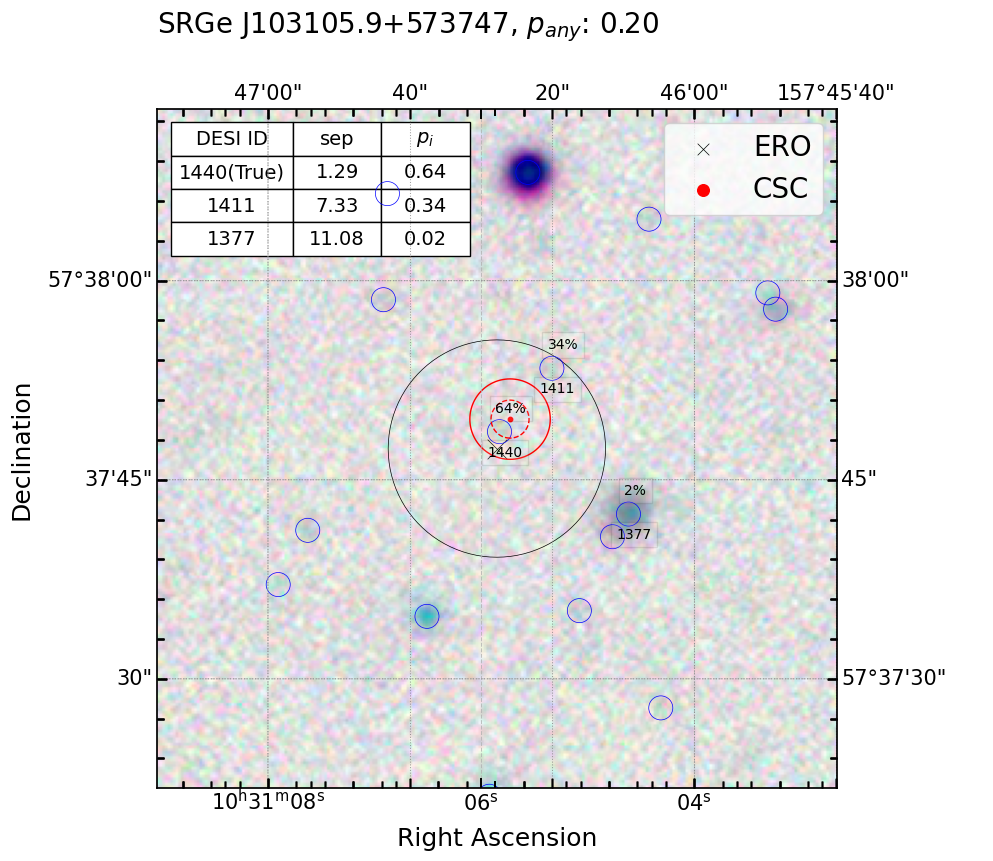

non secure sources of XMM/CSC are not SHOWN!

SRGe J105149.5+573244



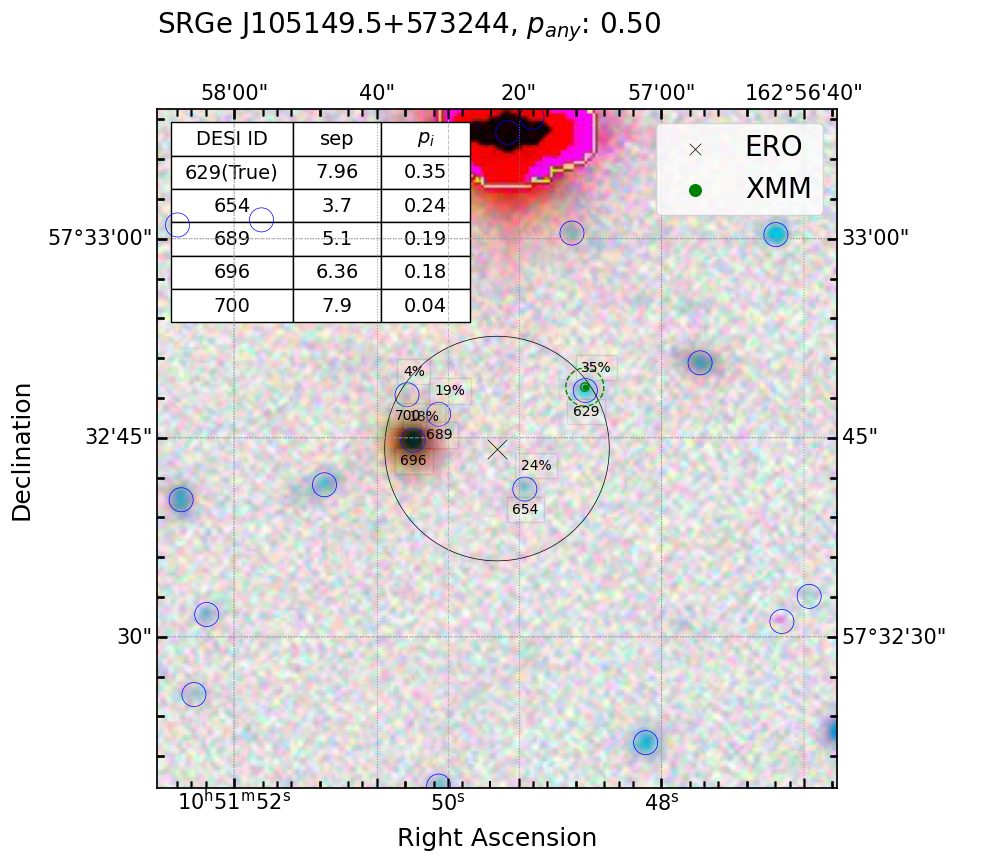

non secure sources of XMM/CSC are not SHOWN!

SRGe J104808.6+584742



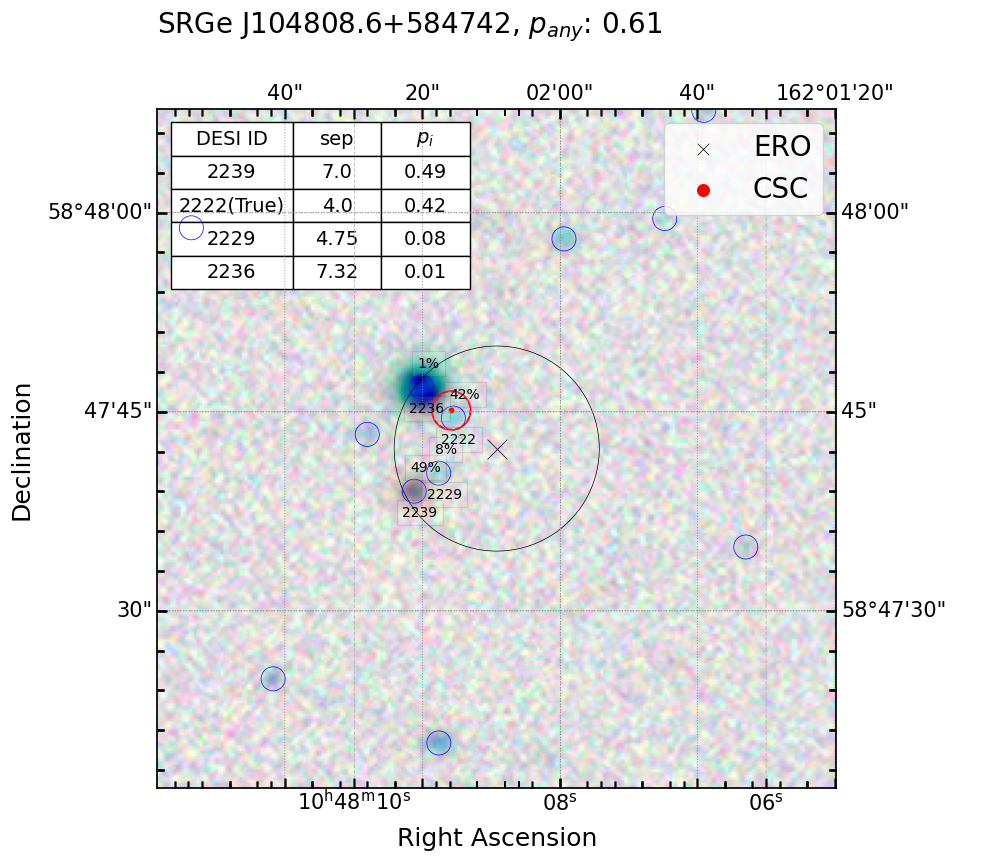

non secure sources of XMM/CSC are not SHOWN!

SRGe J105050.2+580156



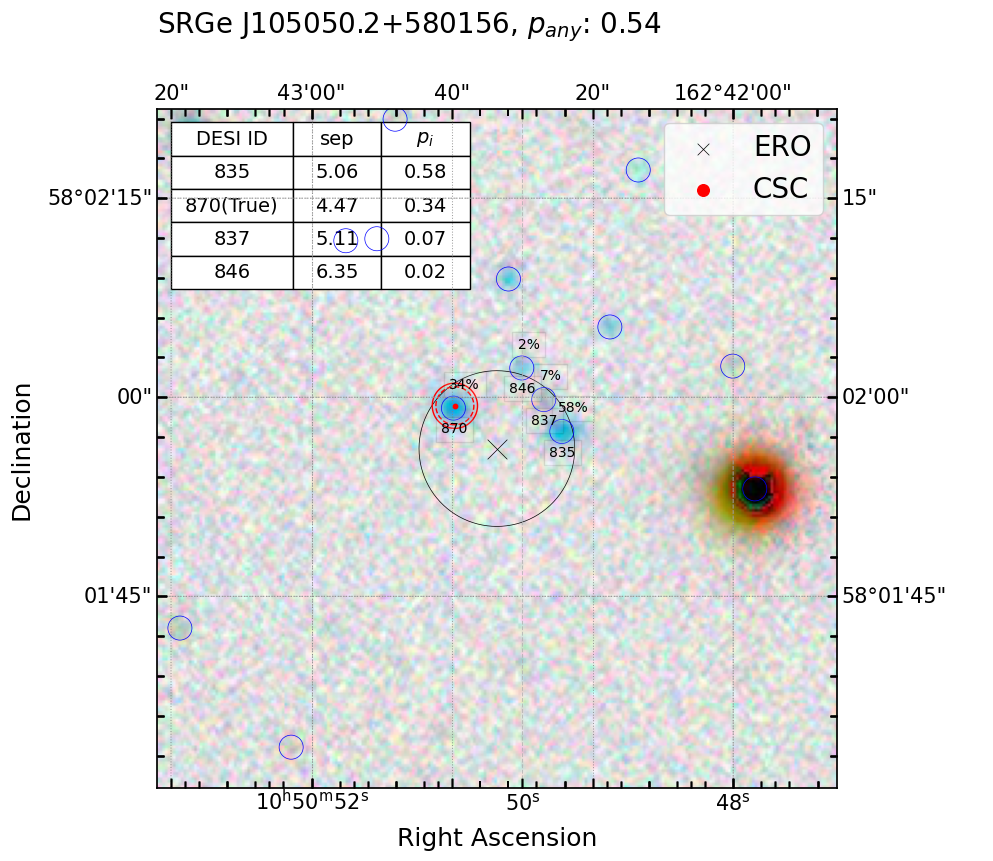

In [6]:
from scripts.viewer import desi_image_cutout_for_nway

def desi_plot(eroid):
    return desi_image_cutout_for_nway(
                           ero_name = eroid,
                            nway_df = ero_allcand_df,
                           xmm_df = xmm_all_df,
                           csc_df = csc_all_df,
                           );


fig = desi_plot('SRGe J103105.9+573747')
fig.savefig(data_path+'/paper_plots/match_ex_1.png')


fig = desi_plot('SRGe J105149.5+573244')
fig.savefig(data_path+'/paper_plots/match_ex_2.png')



fig = desi_plot('SRGe J104808.6+584742')
fig.savefig(data_path+'/paper_plots/match_ex_3.png')



fig = desi_plot('SRGe J105050.2+580156')
fig.savefig(data_path+'/paper_plots/match_ex_4.png')


In [9]:

# #correct match 
# desi_plot('SRGe J110612.0+585212');

# #correct match, complex field
# desi_plot('SRGe J103225.3+573157')

# #incorrect match 
# desi_plot("SRGe J103217.9+573836")
# #true hostless
# desi_plot('SRGe J103220.4+573211');
# #false hostless
# desi_plot('SRGe J104831.3+584027')

# #generic example
# desi_plot('SRGe J103118.8+574434');
